# Layerwise Sensitivity

See how much different layers are sensitive to (1) pairs with dobj/iobj change, and (2) random sentence pairs.

In [1]:
import sys
sys.path.append('../')

from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
import pandas as pd
import os, sys, time, re
import matplotlib.pyplot as plt
import random
import pickle
from scipy.spatial.distance import cosine
import seaborn as sns

import src.sent_encoder
import src.sentpair_generator

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Load sentence pairs

In [2]:
with open('../data/sents.pkl', 'rb') as f:
  data = pickle.load(f)
  data = list(data)

In [3]:
# https://wortschatz.uni-leipzig.de/en/download/english
# Wikipedia, 2016, 10K sentences
sentgen = src.sentpair_generator.SentPairGenerator()
wiki_sents = sentgen.get_wikipedia()

In [4]:
len(data)

321

In [5]:
enc = src.sent_encoder.SentEncoder()

## Generate boxplots

In [6]:
distances = enc.get_layer_distance_df(data)

Processing layer: 0
Processing layer: 1
Processing layer: 2
Processing layer: 3
Processing layer: 4
Processing layer: 5
Processing layer: 6
Processing layer: 7
Processing layer: 8
Processing layer: 9
Processing layer: 10
Processing layer: 11
Processing layer: 12


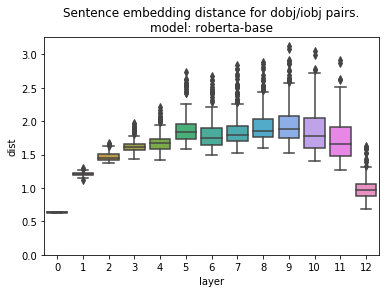

In [7]:
model_name = 'roberta-base'
sns.boxplot(x='layer', y='dist', data=distances)
plt.title(f"Sentence embedding distance for dobj/iobj pairs.\nmodel: {model_name}")
plt.ylim(0)
plt.show()

In [8]:
wiki_sents = sentgen.get_wikipedia()
wiki_distances = enc.get_layer_distance_df(wiki_sents)

Processing layer: 0
Processing layer: 1
Processing layer: 2
Processing layer: 3
Processing layer: 4
Processing layer: 5
Processing layer: 6
Processing layer: 7
Processing layer: 8
Processing layer: 9
Processing layer: 10
Processing layer: 11
Processing layer: 12


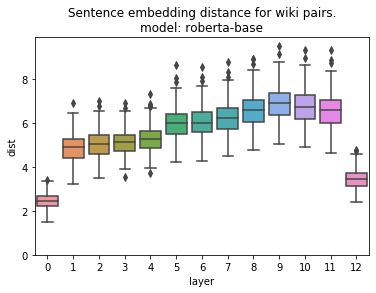

In [9]:
sns.boxplot(x='layer', y='dist', data=wiki_distances)
plt.title(f"Sentence embedding distance for wiki pairs.\nmodel: {model_name}")
plt.ylim(0)
plt.show()

## Combined plot

In [10]:
distances['dataset'] = 'dobj/iobj'
wiki_distances['dataset'] = 'random wiki'
combined_df = pd.concat([distances, wiki_distances])

/h/bai/moar/bai-conda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


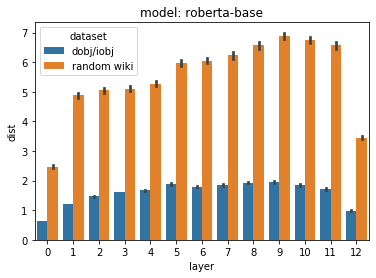

In [11]:
sns.barplot(x='layer', y='dist', hue='dataset', data=combined_df)
plt.title(f"model: {model_name}")
plt.ylim(0)
plt.show()